In [161]:
using Plots;
using HTTP;
using CSV;

┌ Info: Precompiling HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3]
└ @ Base loading.jl:1278


In [160]:
import Pkg; Pkg.add("HTTP")

   Updating registry at `C:\Users\Victor\.julia\registries\General`
  Resolving package versions...
  Installed libsodium_jll ────── v1.0.18+1
  Installed DataAPI ──────────── v1.6.0
  Installed PlotThemes ───────── v2.0.1
  Installed Tables ───────────── v1.3.2
  Installed CategoricalArrays ── v0.9.3
  Installed DataStructures ───── v0.18.9
  Installed StatsBase ────────── v0.33.3
  Installed JLLWrappers ──────── v1.2.0
  Installed Zstd_jll ─────────── v1.4.8+0
  Installed Parsers ──────────── v1.0.16
  Installed LaTeXStrings ─────── v1.2.1
  Installed Adapt ────────────── v3.2.0
  Installed ZeroMQ_jll ───────── v4.3.2+6
  Installed ColorTypes ───────── v0.10.10
  Installed InteractBase ─────── v0.10.6
  Installed WebSockets ───────── v1.5.9
  Installed PlotUtils ────────── v1.0.10
  Installed OrderedCollections ─ v1.4.0
  Installed StructTypes ──────── v1.4.0
  Installed Missings ─────────── v0.4.5
  Installed StructArrays ─────── v0.5.0
  Installed GeometryBasics ───── v0.3.9
Updati

## 1

In [1]:
function euler_SIR(b, g, S0, I0, R0, h, T)
    s = S0
    i = I0
    r = R0
    
    Ss = [s]
    Is = [i]
    Rs = [r]
    
    for t in 1:T
        s_new = s - h*s*i
        i_new = i + h*s*i - h*g*i
        r_new = r + h*g*i
        
        push!(Ss, s_new)
        push!(Is, i_new)
        push!(Rs, r_new)
        
        s = s_new
        i = i_new
        r = r_new
    end
    return Ss, Is, Rs
end

euler_SIR (generic function with 1 method)

In [4]:
S, I, R = euler_SIR(0.1, 0.05, 0.99, 0.01, 0.0, 0.1, 300)

([0.99, 0.98901, 0.9879280230599999, 0.9867457422351253, 0.9854541195512322, 0.9840433537358992, 0.9825028258166221, 0.9808210428840605, 0.9789855804274279, 0.9769830237795197  …  5.451558440474493e-7, 5.28768000561955e-7, 5.129522646330057e-7, 4.976862984735938e-7, 4.829487199687386e-7, 4.687190584792924e-7, 4.5497771283357706e-7, 4.4170591139178497e-7, 4.2888567407446516e-7, 4.1649977625243936e-7], [0.01, 0.01094, 0.01196727694, 0.013089721380174573, 0.014315895457166834, 0.015655081795213983, 0.017117334305515132, 0.0187135305665492, 0.020455425370349008, 0.022355704891405367  …  0.3006084161883798, 0.2991053904952814, 0.29760987935854094, 0.2961218452277144, 0.2946412507391543, 0.29316805871512003, 0.2917022321628901, 0.29024373427387706, 0.288792528422745, 0.2873485781665291], [0.0, 5.000000000000001e-5, 0.00010470000000000002, 0.00016453638470000003, 0.0002299849916008729, 0.00030156446888670706, 0.000379839877862777, 0.0004654265493903527, 0.0005589942022230988, 0.00066127132907

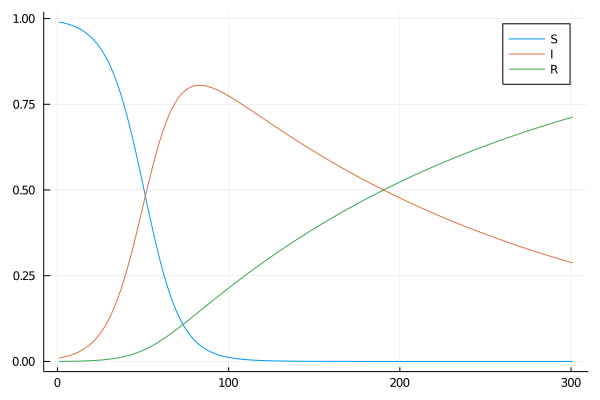

In [6]:
plot(S, label = 'S')
plot!(I, label = 'I')
plot!(R, label = 'R')

## 2

In [7]:
function deriv(f, a, h=0.01)
    return (f(a + h) - f(a))/h
end

function tangent_line(f, a, x)
    f(a) + deriv(f, a)*(x - a)
end

tangent_line (generic function with 1 method)

In [8]:
function f(x)
   return x^3 - 2*x 
end

f (generic function with 1 method)

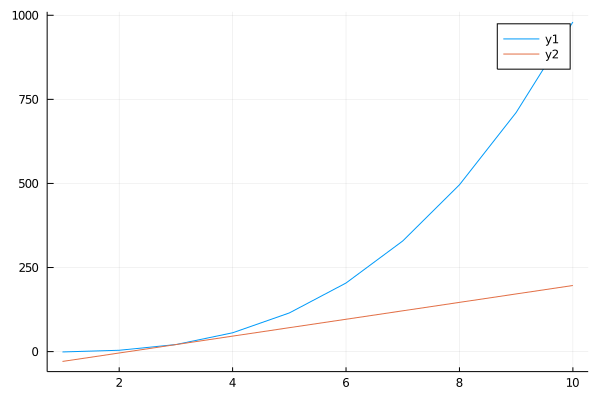

In [15]:
plot(1:10, f.(1:10))
#manual manipulate hooha
plot!(1:10, tangent_line.(f,3,1:10))

In [35]:
function grad(f, a, b)
    
    return deriv(x -> f(x, b), a), deriv(x -> f(a, x), b)
end


grad (generic function with 1 method)

In [36]:
function f(x, y)
    return x + 2y^2
end

grad(f, 1, 3)

(1.0000000000001563, 12.019999999999698)

## 3

In [150]:
function gradient_descent(f, x0, e)
   d = deriv(f, x0) 
    x = x0
    for i in 1:100
        if d > 0
            x = x - e
        elseif d < 0
           x = x + e
        else
            x = x    
        end
        d = deriv(f, x)
    end
    return x
end
    

gradient_descent (generic function with 1 method)

In [41]:
function f(x)   x^4 + 3*x^3 -3*x + 5 end


f (generic function with 2 methods)

In [154]:
function gradient_descent_2d(f, x0, y0, e)
   (d1, d2) = grad(f, x0, y0) 
    z = [x0, y0]
    for i in 1:1000
       if abs.((d1, d2) .- (0, 0)) < (0.1, 0.1)
            z = z
        else
            z = z + -1*sign.([d1,d2])*e
        end
        (d1, d2) = grad(f, z[1], z[2])
    end
    return z
end

gradient_descent_2d (generic function with 1 method)

In [157]:
gradient_descent_2d(f, 5, 1, 0.01)

2-element Array{Float64,1}:
  3.460000000000033
 -0.540000000000001

## 4

In [165]:
url = "https://raw.githubusercontent.com/mitmath/6S083/master/problem_sets/some_data.csv"
csv = CSV.File(HTTP.get(url).body);

In [170]:
xs, ys = csv.columns;

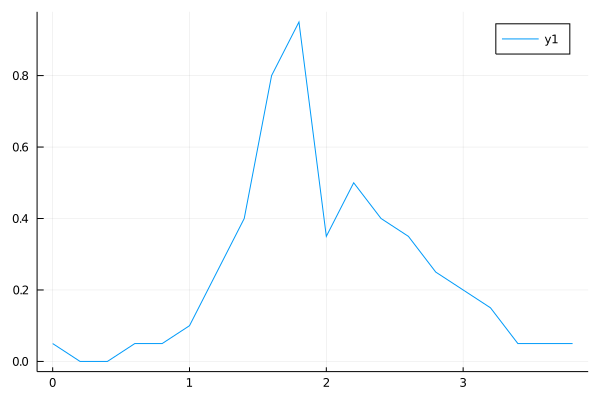

In [172]:
plot(xs, ys)

In [189]:
function f(x, u, s)
    return (1/(s*sqrt(2*pi)))*exp((-(x-u)^2)/(2*(s^2)))
end

function loss(u, s)
    return reduce(+, (f.(xs, u, s) - ys).^2)
end

loss (generic function with 2 methods)

In [192]:
gradient_descent_2d(loss, 0, 1, 0.01)

2-element Array{Float64,1}:
 1.8800000000000014
 0.5999999999999996

## 5